<a href="https://colab.research.google.com/github/mustafabozkaya/NLP_Notebooks/blob/master/word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word embeddings in 2020. Review with code  examples

by [Rostyslav Neskorozhenyi](https://www.linkedin.com/in/slanj)

In this article we will study word embeddings - digital representation of words suitable for processing by machine learning algorithms.

Originally I created this article as a general overview and compilation of current approaches to word embeddings in 2020, which our [AI Labs](http://ai-labs.org/) team could use from time to time as a quick refresher. I hope that my article will be useful to a wider circle of data scientists and developers. Each word embedding method in the article has a (very) short description, links for further study, and code examples in Python. All code is packed as [Google Colab Notebook](https://colab.research.google.com/drive/1N7HELWImK9xCYheyozVP3C_McbiRo1nb). So let's begin.

According to Wikipedia, **Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

## One-hot or CountVectorizing

The most basic method for transforming words into vectors is to count occurrence of each word in each document. Such approach is called countvectorizing or one-hot encoding.

The main principle of this method is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in each document. Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer(binary=False)
corpus = [
          'A Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]

In [2]:
corpus

['A Text of the very first new sentence with the first words in sentence.',
 'Text of the second sentence.',
 'Number three with lot of words words words.',
 'Short text, less words.']

In [3]:
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus) #
vocab = vectorizer.get_feature_names_out()
vocab

array(['first', 'in', 'less', 'lot', 'new', 'number', 'of', 'second',
       'sentence', 'short', 'text', 'the', 'three', 'very', 'with',
       'words'], dtype=object)

In [4]:
term_frequencies

<4x16 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [5]:
term_frequencies = term_frequencies.toarray() # convert sparse matrix to numpy array
term_frequencies

array([[2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

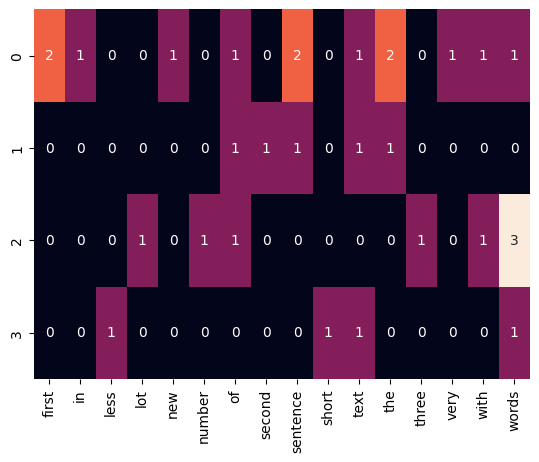

In [6]:
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

In [7]:
# Convert another document with countvectorizing
vectorizer.transform(['A new new sentence.']).toarray()

array([[0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

## one-hot encoding

Another approach in countvectorizing is just to place 1 if the word is found in the document (no matter how often) and 0 if the word is not found in the document. In this case we get real 'one-hot' encoding.

In [8]:
one_hot_vectorizer = CountVectorizer(binary=True) # binary means 1 or 0
one_hot = one_hot_vectorizer.fit_transform(corpus)
one_hot

<4x16 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [9]:
one_hot.shape

(4, 16)

In [10]:
one_hot = one_hot.toarray() # convert sparse matrix to numpy array
one_hot

array([[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]])

<Axes: >

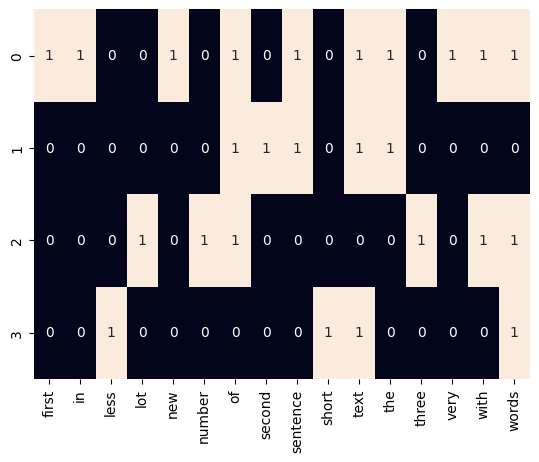

In [11]:
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

## TF-IDF encoding

With a large corpus of documents some words like ‘a’, ‘the’, ‘is’, etc. occur very frequently but they don’t carry a lot of information. Using one-hot encoding approach we can decide that these words are important because they appear in many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible.

TF-IDF (term frequency - inverse document frequency) can deal with this problem better. TF-IDF lowers the weight of commonly used words and raises the weight of rare words that occur only in current document. TF-IDF formula looks like this:
<br><br>

$tfidf(term, document)= tf(term, document) \cdot idf(term)$

<br>
Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document

$tf(term, document)= \frac{n_i}{\sum_{k=1}^W n_k}$

IDF (inverse document frequency), interpreted like inversed number of documents, in which the term we’re interested in occurs. N - number of documents, n(t) - number of documents with current word or term t.


$idf(term) = \log {\frac{N}{n_t}} $




In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]

vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

In [13]:
tfidf_vectorizer = TfidfVectorizer() #Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf = tfidf_vectorizer.fit_transform(corpus) # X : sparse matrix of (n_samples, n_features) ,Tf-idf-weighted document-term matrix.
tfidf

<2x7 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [14]:
tfidf.shape

(2, 7)

In [15]:
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray() # convert tf-idf weighted documents term sparse matrix to numpy array
tfidf

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

<Axes: >

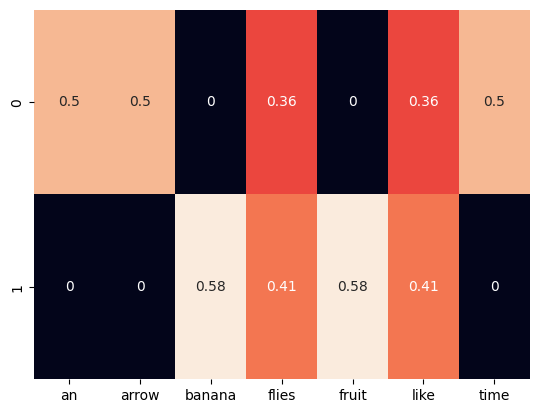

In [16]:
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

## Word2Vec and GloVe

The most commonly used models for word embeddings are [word2vec](https://github.com/dav/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/) which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings).

Word2Vec word embeddings are vector representations of words,
that are typically learnt by an unsupervised model when fed
with large amounts of text as input (e.g. Wikipedia, science, news, articles etc.). These representation of words capture semantic similarity between words among other properties. Word2Vec word embeddings are learnt in a such way, that [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between vectors for words with close meanings ("king" and "queen" for example) are closer than distance for words with complety different meanings ("king" and "carpet" for example).

![Замещающий текст](https://developers.google.com/machine-learning/crash-course/images/linear-relationships.svg)
Image from [developers.google.com](https://developers.google.com/machine-learning/crash-course/embeddings/translating-to-a-lower-dimensional-space)

Word2Vec vectors even allow some mathematic operations on vectors. For example, in this operation we are using word2vec vectors for each word:

**king - man + woman = queen**

In [19]:
# Download Google Word2Vec embeddings https://code.google.com/archive/p/word2vec/
# got o Pre-trained word and phrase vectors part
!wget https://drive.google.com/open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&authuser=0
!gunzip GoogleNews-vectors-negative300.bin

--2023-06-30 09:05:46--  https://drive.google.com/open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving drive.google.com (drive.google.com)... 108.177.126.101, 108.177.126.102, 108.177.126.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?usp=drive_open [following]
--2023-06-30 09:05:47--  https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM’

open?id=0B7XkCwpI5K     [ <=>                ]  78.15K  --.-KB/s    in 0.01s   

2023-06-30 09:05:49 (6.64 MB/s) - ‘open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM’ saved [80027]

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
# Try Word2Vec with Gensim

import gensim

# Load pretrained vectors from Google
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
king = model['king']
print(king.shape)
print(king[:10])

In [ ]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man'])[:3])

In [ ]:
print(model.doesnt_match("breakfast robot dinner lunch".split()))

In [ ]:
print(model.similarity('woman', 'man'))

In [ ]:
print(model.similarity('king', 'woman'))

Another word embedding method is **Glove** (“Global Vectors”). It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [20]:
# Try Glove word embeddings with Spacy
# https://www.datasciencelearner.com/how-to-install-en_core_web_lg-spacy-model/

!python3 -m spacy download en_core_web_lg

2023-06-30 09:27:09.759619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 09:27:11.109396: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")
doc,len(doc),type(doc)

(man king stands on the carpet and sees woman queen, 10, spacy.tokens.doc.Doc)

In [34]:
# Get the token for 'king':
doc[1],doc[1].shape,type(doc[1])

(king, 13110060611322374290, spacy.tokens.token.Token)

In [36]:
# Get the vector(numpy arrray ) for 'king':
doc[1].vector, doc[1].vector.shape ,type(doc[1].vector)

(array([-1.1296e-01, -4.1865e+00, -1.8453e+00,  3.0781e-01,  2.4956e+00,
         9.6267e-01, -1.8161e+00,  4.4655e+00, -2.8210e+00,  9.7090e-01,
         1.3542e+01,  4.3195e-01, -5.3098e+00,  4.7098e+00,  2.9030e+00,
         1.5588e+00,  6.0064e+00, -3.0345e+00,  1.0626e+00, -7.7197e-01,
        -5.4771e+00, -9.7380e-01, -4.4345e+00,  5.8367e+00,  2.4302e+00,
        -3.9408e+00, -9.1862e-01, -4.9124e+00,  1.4591e+00, -7.2772e-01,
         3.4957e+00, -4.0077e+00, -1.8354e+00, -4.1052e+00,  4.9211e+00,
        -9.7053e-01,  1.9223e+00,  5.2605e+00,  1.6086e+00,  7.1328e-01,
        -1.2146e+00, -1.9869e+00,  8.0265e-01,  2.9298e+00,  7.2985e-01,
        -6.2892e-01, -1.7082e+00,  1.9893e+00,  4.7529e-01,  3.2264e+00,
        -3.9215e+00,  4.6556e+00,  1.3475e+00, -1.0979e+00, -3.0365e+00,
         1.5815e+00,  2.2835e+00, -4.0616e+00,  2.5730e+00,  4.0618e+00,
         9.5438e-01, -6.2563e+00,  5.6463e+00, -3.8933e+00,  4.4076e+00,
         2.0517e+00, -6.6906e+00, -6.9448e+00,  6.0

In [30]:
# Get the vector for 'king':
doc[1].vector[:50]

array([-0.11296, -4.1865 , -1.8453 ,  0.30781,  2.4956 ,  0.96267,
       -1.8161 ,  4.4655 , -2.821  ,  0.9709 , 13.542  ,  0.43195,
       -5.3098 ,  4.7098 ,  2.903  ,  1.5588 ,  6.0064 , -3.0345 ,
        1.0626 , -0.77197, -5.4771 , -0.9738 , -4.4345 ,  5.8367 ,
        2.4302 , -3.9408 , -0.91862, -4.9124 ,  1.4591 , -0.72772,
        3.4957 , -4.0077 , -1.8354 , -4.1052 ,  4.9211 , -0.97053,
        1.9223 ,  5.2605 ,  1.6086 ,  0.71328, -1.2146 , -1.9869 ,
        0.80265,  2.9298 ,  0.72985, -0.62892, -1.7082 ,  1.9893 ,
        0.47529,  3.2264 ], dtype=float32)

Find similarity between King and Queen tokens (higher value is better).

In [37]:
doc[1].similarity(doc[9])

0.6108841896057129

Find similarity between King and carpet

In [38]:
doc[1].similarity(doc[5])

0.09562856703996658

Check if king - man + woman = queen. We will multiply vectors for 'man' and 'woman' by two, because subtracting the vector for 'man' and adding the vector for 'woman' will do little to the original vector for “king”, likely because those “man” and “woman” are related themselves.

In [39]:
doc

man king stands on the carpet and sees woman queen

In [50]:
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)
v.shape,type(v)

((300,), numpy.ndarray)

# Format the vocabulary for use in the distance function




Find the closest word below


In [51]:
from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)
vectors.shape,type(vectors)


((10, 300), numpy.ndarray)

## The Cosıne Distances

In [52]:
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text

In [53]:
output_word

'king'

## FastText

[FastText](https://github.com/facebookresearch/fastText) is an extension of word2vec. FastText was developed by the team of Tomas Mikolov who proposed the word2vec framework in 2013.

The main improvement of FastText over the original word2vec vectors is the inclusion of character [n-grams](https://en.wikipedia.org/wiki/N-gram), which allows computing word representations for words that did not appear in the training data (“out-of-vocabulary” words).

In [2]:
!pip install Cython --install-option="--no-cython-compile"
!pip install fasttext


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
# download pre-trained language word vectors from one of 157 languges  https://fasttext.cc/docs/en/crawl-vectors.html
# it will take some time, about 5 minutes
import fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English



In [6]:
ft = fasttext.load_model('cc.en.300.bin')

In [7]:
ft.get_word_vector('king').shape

(300,)

Test model ability to create vectors for unknown words.

In [8]:
'king' in ft.words

True

In [9]:
'burgerking' in ft.words

True

In [10]:
'king-warrior' in ft.words

False

In [11]:
ft.get_nearest_neighbors('king')

[(0.7550359964370728, 'kings'),
 (0.7068519592285156, 'queen'),
 (0.7060439586639404, 'king-'),
 (0.6811205148696899, 'king.'),
 (0.660710871219635, 'king.The'),
 (0.6591265797615051, 'King'),
 (0.6495252251625061, 'prince'),
 (0.6278106570243835, '-king'),
 (0.6183920502662659, 'monarch'),
 (0.6070184707641602, 'queen-mother')]

In [12]:
ft.get_nearest_neighbors('burgerking')

[(0.6571484208106995, 'mcdonalds'),
 (0.643631100654602, 'tacobell'),
 (0.6353889107704163, 'macdonalds'),
 (0.6343632340431213, 'Mcdonalds'),
 (0.6275104284286499, 'mcds'),
 (0.6220166087150574, 'pizzahut'),
 (0.6129778623580933, 'arbys'),
 (0.6086134314537048, 'BurgerKing'),
 (0.592319667339325, 'applebees'),
 (0.5817458629608154, 'wendys')]

In [13]:
ft.get_nearest_neighbors('king-warrior')

[(0.43609192967414856,
  'strachanenlightenmententrepreneursentrepreneurshipenvironmentalismEric'),
 (0.4255003333091736, 'hunter-warrior'),
 (0.39559242129325867, 'NinjaPirateZombieRobot'),
 (0.3859368860721588,
  'deblogueroreflejoantecedentesexitlacuachebateysuteindesignableabsorbersexilatifundiosexibrezarsutemultiétnicosexiplinrapobrezarcorrentosoVd.lazadafisiochillidomabrezarsico-chuzaoutcolodrablogueroin'),
 (0.3846653997898102,
  'ResultsLadderTeamsBluesBrumbiesBullsCheetahsChiefsCrusadersForceHighlandersHurricanesJaguaresKingsLionsRebelsRedsSharksStormersSunwolvesWaratahsPlayersTippingFantasyRugby'),
 (0.37958475947380066,
  'FriendsHungryForAppsSharewareOnSaleDonationCoderGhacks'),
 (0.3776894211769104,
  'ESTATERETAILCONSUMERPHONESCARSBIKESAPPSINTERNETTABLETSCOMPUTERSSOCIETYPOLITICSLAWCRIMEENVIRONMENTSCIENCEARTSCELEBRITIESSPORTSSPECIALSFIRST'),
 (0.37076932191848755,
  'ResultsTeamsBroncosBulldogsCowboysDragonsEelsKnightsPanthersRabbitohsRaidersRoostersSea-EaglesSharksStormTi

## ELMo (Embeddings from Language Models)

Unlike traditional word embeddings such as word2vec and GLoVe, the ELMo vector assigned to a token or word depends on current context and is actually a function of the entire sentence containing that word. So, the same word can have different word vectors under different contexts. Also,  ELMo representations are purely character based, so they are not limited to any predefined vocabulary.

Description from official site:

**[ELMo](https://allennlp.org/elmo)** is a deep contextualized word representation that models both (1) complex characteristics of word use (e.g., syntax and semantics), and (2) how these uses vary across linguistic contexts (i.e., to model polysemy). These word vectors are learned functions of the internal states of a deep bidirectional language model (biLM), which is pre-trained on a large text corpus. They can be easily added to existing models and significantly improve the state of the art across a broad range of challenging NLP problems, including question answering, textual entailment and sentiment analysis.

In [15]:
# use tensorflow 1.x for ELMo, because there are still no ELMo for tensorflow 2.0

%tensorflow_version 1.x

ValueError: ignored

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
# Download pretrained ELMo model from Tensorflow Hub https://tfhub.dev/google/elmo/3

elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

In order to send sentences to the model we need to split them into the arrays of words and pad arrays to the same length. Also we will create 'mask' array, that will show whether element is a real word or a padding symbol (in our case - '_'). We will use 'mask' array for visualization later, to show only real words.

In [ ]:
words = []
mask = []
masked_words = []

for sent in sentences:
  splitted = sent.split()
  for i in range(36):
    try:
      words.append(splitted[i])
    except:
      words.append('_')

for word in words:
  if word == "_":
    mask.append(False)
  else:
    mask.append(True)
    masked_words.append(word)


In [ ]:
len(masked_words)

Create embeddings with ELMo:

In [ ]:
embeddings = elmo(
    sentences,
    signature="default",
    as_dict=True)["elmo"]

Convert Tensorflow tensors to numpy array.

In [ ]:
%%time
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  x = sess.run(embeddings)

In [ ]:
x.shape

In [ ]:
embs = x.reshape(-1, 1024)
embs.shape

In [ ]:
masked_embs = embs[mask]
masked_embs.shape

Visualize embeddings using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
y = pca.fit_transform(masked_embs)

from sklearn.manifold import TSNE

y = TSNE(n_components=2).fit_transform(y)

In [ ]:
import plotly as py
import plotly.graph_objs as go


data = [
    go.Scatter(
        x=[i[0] for i in y],
        y=[i[1] for i in y],
        mode='markers',
        text=[i for i in masked_words],
    marker=dict(
        size=16,
        color = [len(i) for i in masked_words], #set color equal to a variable
        opacity= 0.8,
        colorscale='Viridis',
        showscale=False
    )
    )
]
layout = go.Layout()
layout = dict(
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
fig = go.Figure(data=data, layout=layout)

In [ ]:
fig.show()

## Transformers

At last it's time for current state-of-the-art approach - Transformers. Famous [GPT-2](https://openai.com/blog/better-language-models/), [BERT](https://github.com/google-research/bert), [CTRL](https://blog.einstein.ai/introducing-a-conditional-transformer-language-model-for-controllable-generation/) are all Transformers-based and produce context-sensitive embeddings like ELMo. But unlike ELMo Transformers do not use [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network), trey do not require to process words in sentence sequentially one-by-one. All words in the sentence are processed in parallel, this approach speeds up processing and solves [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Transformers use the [attention mechanizm](https://arxiv.org/abs/1706.03762) to describe the connections and dependencies of each specific word with all other words in the sentence. This mechanism and the main principles of Transformers described in detail in a beautifully illustrated [article](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png) Image from[ http://jalammar.github.io](http://jalammar.github.io/illustrated-transformer/)



For our example we wil use brilliant [Transformers](https://huggingface.co/transformers/) library, which contains the latest Transformers-based models (such as [BERT](https://huggingface.co/transformers/model_doc/bert.html), [XLNet](https://huggingface.co/transformers/model_doc/xlnet.html), [DialoGPT](https://huggingface.co/transformers/model_doc/dialogpt.html) or [GPT-2](https://huggingface.co/transformers/model_doc/gpt2.html)).

Let's make some embeddings with BERT. Firstly we will need to install Transformers library.

In [ ]:
!pip install transformers

Now we import pytorch, the pretrained BERT model, and a BERT tokenizer, that will do all the needed work of converting sentences into format appropriate for BERT (tokenizing itself and adding special tokens like [SEP] and [CLS]).

In [ ]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel

import logging
import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Enter some sentences and tokenize them.

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0][:99])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])


Note that some tokens may look like this: ['aa', '##th', '##ur', 'pen', '##dra', '##gon']. This is because of the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. BERT tokenizer uses vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. So, if the word is not mentioned in a vocabulary, that words is splitted into subwords and characters.  The two hash signs (##) before some subwords shows that subword is part of a larger word and preceded by another subword.   

We will use tokenizer.encode_plus function, that will:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.
- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []


for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=True,
                        max_length = 48,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Save tokens from sentence as a separate array. We will use it later to explore and compare embeddings.
    marked_text = "[CLS] " + sent + " [SEP]"
    tokenized_texts.append(tokenizer.tokenize(marked_text))

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

# Convert the list into tensor.
input_ids = torch.cat(input_ids, dim=0)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

**Segment ID**. BERT is trained on and expects sentence pairs using 1s and 0s to distinguish between the two sentences. We will encode each sentence separately so we will just mark each token in each sentence with 1.

In [ ]:
segments_ids = torch.ones_like(input_ids)
segments_ids.shape

Now we can call BERT model and finally get embeddings.

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval();

In [ ]:
with torch.no_grad():

    outputs = model(input_ids, segments_ids)

    # Evaluating the model will return a different number of objects based on
    # how it's  configured in the `from_pretrained` call earlier. In this case,
    # becase we set `output_hidden_states = True`, the third item will be the
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

Let's examine what we've got.

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))


In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

In [ ]:
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

token_embeddings.size()

In [ ]:
# we will use last four hidden layers to create each word embedding

processed_embeddings = token_embeddings[:, :, 9:, :]
processed_embeddings.shape

In [ ]:
# Concatenate four layers for each token to create embeddings

embeddings = torch.reshape(processed_embeddings, (4, 48, -1))
embeddings.shape

Let's examine embeddings for the first sentence. Firstly we need to get ids of tokens we need to compare.

In [ ]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

We can see that word 'king' is places at indexes 1 and 17. We will check distance between embeddings 1 and 17. Also, we will check if embedding for word 'arthur' is closer to king then word 'table'.

In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

So we see that embeddings for two 'kings' are quite similar but not same, and Archtur is closer to be a king than a table.

Things may be simplier with **[simplerepresentations](https://github.com/AliOsm/simplerepresentations)** module. This module does all the work we did earlier - extracts needed hidden states from BERT and creates embeddings in a few lines of code.

In [ ]:
!pip install simplerepresentations

In [ ]:
import torch
from simplerepresentations import RepresentationModel
torch.manual_seed(0)

model_type = 'bert'
model_name = 'bert-base-uncased'

representation_model = RepresentationModel(
		model_type=model_type,
		model_name=model_name,
		batch_size=4,
		max_seq_length=48, # truncate sentences to be less than or equal to 48 tokens
		combination_method='cat', # concatenate the last `last_hidden_to_use` hidden states
		last_hidden_to_use=4 # use the last 4 hidden states to build tokens representations
	)

text_a = sentences

all_sentences_representations, all_tokens_representations = representation_model(text_a=text_a)

print(all_sentences_representations.shape) # (4, 768) => (number of sentences, hidden size)
print(all_tokens_representations.shape) # (4, 48, 3072) => (number of sentences, number of tokens, hidden size)

Check distaces between Archtur, king and table.

In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(all_tokens_representations[0][1], all_tokens_representations[0][17])
king_table = cosine(all_tokens_representations[0][1], all_tokens_representations[0][46])
king_archtur = cosine(all_tokens_representations[0][2], all_tokens_representations[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

Same results, less code.

## Conclusion

I hope that after reading this article you have formed an idea of the current approaches to word embeddings and began to understand how to quickly implement these approaches in Python. The world of NLP is diverse and there are many more models and methods for embeddings. In my article I focused on the most common and those that we ourselves often use in our work. You can find additional information in the **References** section.

## References

- [BERT Word Embeddings Tutorial](https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [FROM Pre-trained Word Embeddings TO Pre-trained Language Models — Focus on BERT](https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598)
- [ Make your own Rick Sanchez (bot) with Transformers and DialoGPT fine-tuning](https://towardsdatascience.com/make-your-own-rick-sanchez-bot-with-transformers-and-dialogpt-fine-tuning-f85e6d1f4e30)
- [Playing with word vectors](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519)
- [Intuitive Guide to Understanding GloVe Embeddings](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- [Word Embeddings in Python with Spacy and Gensim](https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/)
- [Brief review of word embedding families (2019) ](https://medium.com/analytics-vidhya/brief-review-of-word-embedding-families-2019-b2bbc601bbfe)
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)